In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
#sns.set_theme()
#%config InlineBackend.figure_format = 'retina'

import scipy.stats as stats
import pylab
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,precision_recall_curve,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
filterwarnings('ignore')

In [2]:
train='train.csv'
df=pd.read_csv(train)
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


**DATA EXPLORATION**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We can see that there is no missing values in our dataset .Thus we do not need to impute any values and can proceed for further analysis

In [5]:
df.shape

(381109, 12)

In [6]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [8]:
print(df['Age'].mean())
print(df['Vehicle_Age'].unique())

38.822583565331705
['> 2 Years' '1-2 Year' '< 1 Year']


In [9]:
df.duplicated().value_counts().to_frame('values')

,values
False,381109


In [10]:
df.drop(['id'],axis=1,inplace=True)
df.drop(['Region_Code'],axis=1,inplace=True)
df.drop(['Policy_Sales_Channel'],axis=1,inplace=True)

So we can see there is no duplicate elements present in our dataset


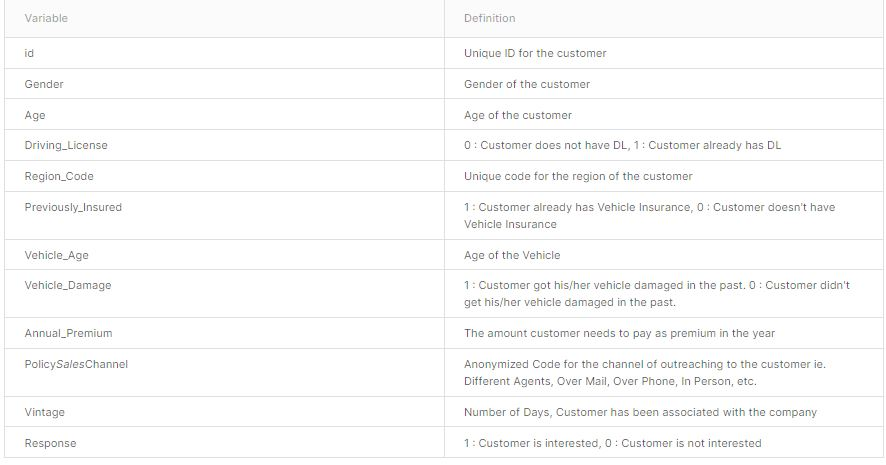

**BUISNESS MODEL -**
Predict, whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [11]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response'],
      dtype='object')

In [12]:
feature=[ 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

In [13]:
list(enumerate(feature))

[(0, 'Gender'),
 (1, 'Age'),
 (2, 'Driving_License'),
 (3, 'Region_Code'),
 (4, 'Previously_Insured'),
 (5, 'Vehicle_Age'),
 (6, 'Vehicle_Damage'),
 (7, 'Annual_Premium'),
 (8, 'Policy_Sales_Channel'),
 (9, 'Vintage'),
 (10, 'Response')]

In [14]:
df.skew(axis=0).to_frame('Skewed Values')

,Skewed Values
Age,0.672539
Driving_License,-21.595182
Previously_Insured,0.167747
Annual_Premium,1.766087
Vintage,0.003030
Response,2.301906


**UNIVARIATE ANALYSIS**

<AxesSubplot:xlabel='Response', ylabel='count'>

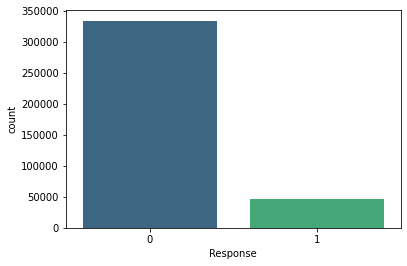

In [15]:
sns.countplot(df['Response'],palette="viridis")

the dataset is highly imbalanced

In [16]:
print('Negative Responses %',(df['Response'].value_counts()[0]/len(df))*100)
print('Positive Responses %',(df['Response'].value_counts()[1]/len(df))*100)

Negative Responses % 87.74366388618479
Positive Responses % 12.256336113815209


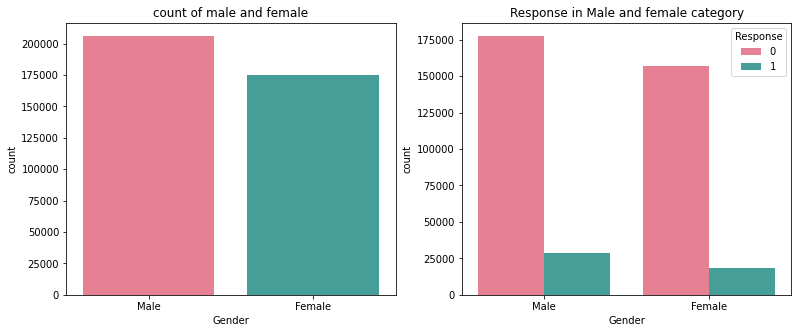

In [17]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(df['Gender'],palette='husl')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

1. The gender variable in the dataset is almost equally distributed.
2. Male category is slightly greater than that of female and chances of buying the insurance is also little high.

<AxesSubplot:xlabel='Age'>

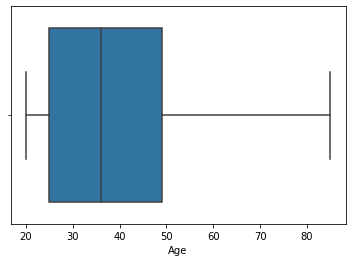

In [18]:
sns.boxplot(df['Age'])

1. Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
2. People aged between 30-60 are more likely to be interested.
3. From the boxplot we can see that there no outlier in the data.

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

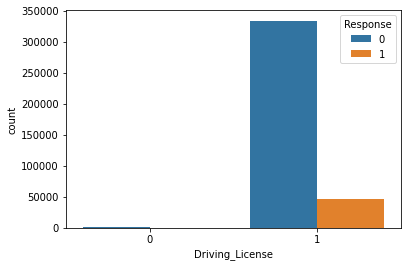

In [19]:
sns.countplot(df['Driving_License'],hue=df['Response'])

Customers who are interested in Vehicle Insurance almost all have driving license

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

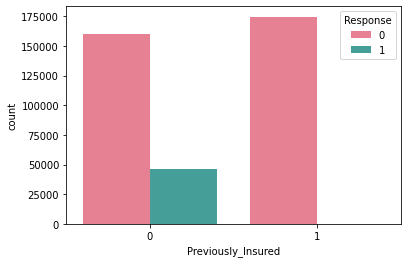

In [20]:
sns.countplot(x='Previously_Insured',hue='Response',data=df,palette='husl')

Customer who are not perviosly insured are likely to be inetrested

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

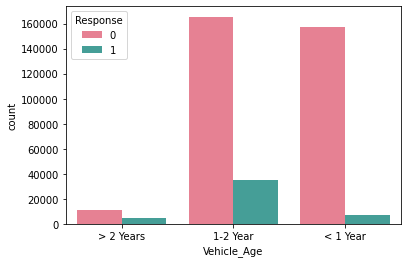

In [21]:
sns.countplot(x='Vehicle_Age',hue='Response',data=df,palette='husl')

1. Customers with vechicle age 1-2 years are more likely to interested as compared to the other two
2. Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

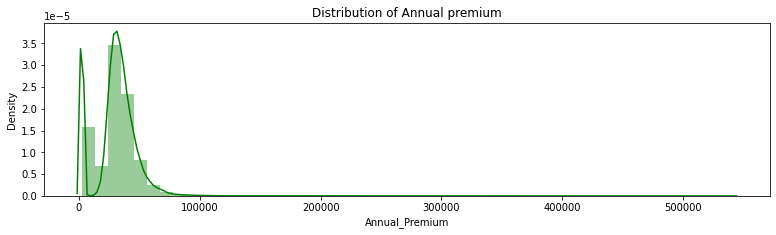

In [22]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

From the distribution plot we can infer that the annual premimum variable is right skewed

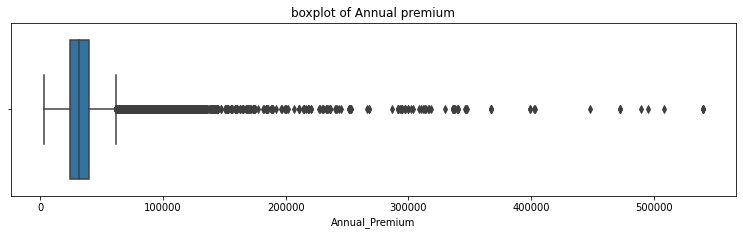

In [23]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

From the boxplot we can observe lot of outliers in the variable

Text(0.5, 1.05, 'Pearson correlation of Features')

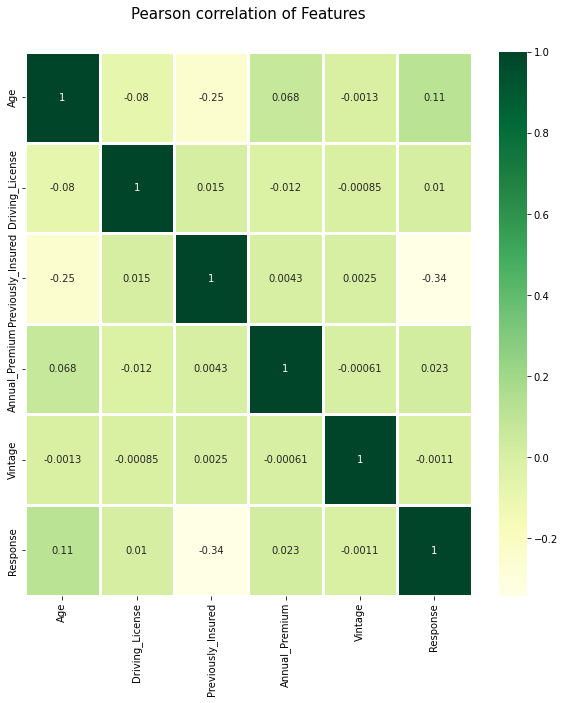

In [24]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

Text(0.5, 1.0, 'Gender vs Response')

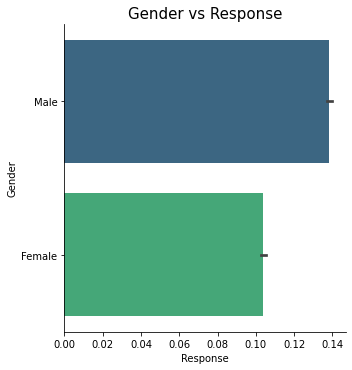

In [25]:
sns.catplot(x='Response',y='Gender',data=df,kind='bar',palette="viridis")
plt.title('Gender vs Response',fontsize=15)

From this graph we can clearly see that Male are having positive response towards insurance purchase while female are having negative response.Thus from this we can conclude that the most targeted customers are Male than Female.So, we need to focus on strengthening the Female customers buyers for buying the insurance.

In [26]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response'],
      dtype='object')

**MULTIVARIATE ANALYSIS**

In [27]:
bin=np.linspace(min(df['Age']),max(df['Age']),5)
groups=['Young_Age','Medium_Age','Old_Age','Senior_Citizen']
df['Age-binned']=pd.cut(df['Age'],bins=bin,labels=groups)

Text(0, 0.5, 'Response')

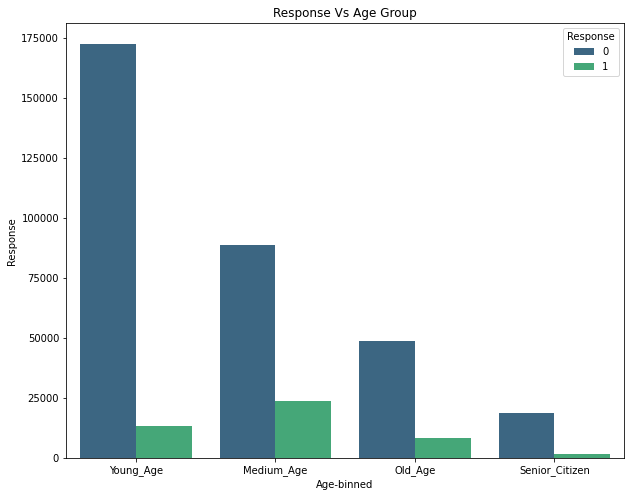

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(df['Age-binned'],hue=df['Response'],palette='viridis')
plt.title('Response Vs Age Group')
plt.ylabel('Response')

From the above graph again we can categorise which Age group people are having more positive positive response and negative response


*   From this we can understand that people in Middle Age group are having more positive response and less negative response but the Young Age group are have more negative response than positive response and also the negative response among this group is more than any Age category group thus we need to increase the alertness or better the product offering for this category of Age group so that we get more positive response from this Age group and also from other Age group.




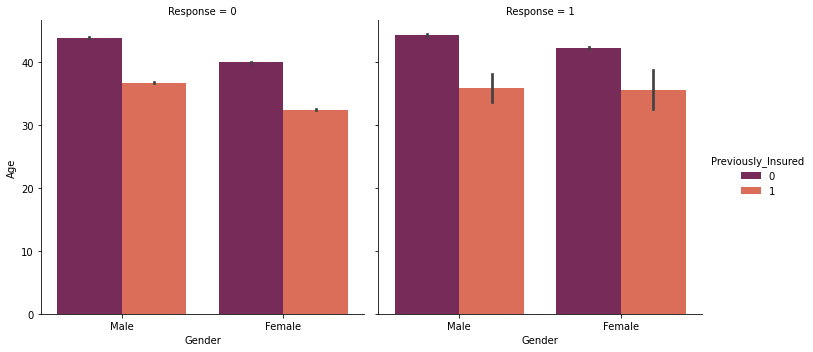

In [29]:
sns.catplot(x='Gender',y='Age',hue='Previously_Insured',col='Response',data=df,kind='bar',palette='rocket')

In this we can understand that the negative response among Male are little over the Age 40 for those who are not previously insured and also Age between 30 to 40 also have higher negative response and that same with female also who are not previously insured upto Age 40 and upto Age 30 for those previously insured

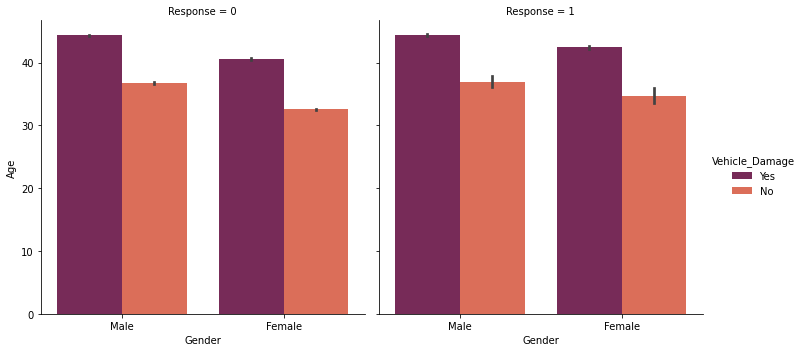

In [30]:
sns.catplot(x='Gender',y='Age',hue='Vehicle_Damage',col='Response',
            data=df,kind='bar',palette='rocket')

We can see that positive response for Male are above 40 for those who were not previously insured against those who were previously insured and same for Female also that Age little over 40 have more positive response for not previously insured against those who were already previously insured

**CHECKING SKEWNESS BUT THIS WILL RESOLVE AFTER RESAMPLING**

In [31]:
df.skew()

Age                    0.672539
Driving_License      -21.595182
Previously_Insured     0.167747
Annual_Premium         1.766087
Vintage                0.003030
Response               2.301906
dtype: float64

**OUTLIER TREATMENT**

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

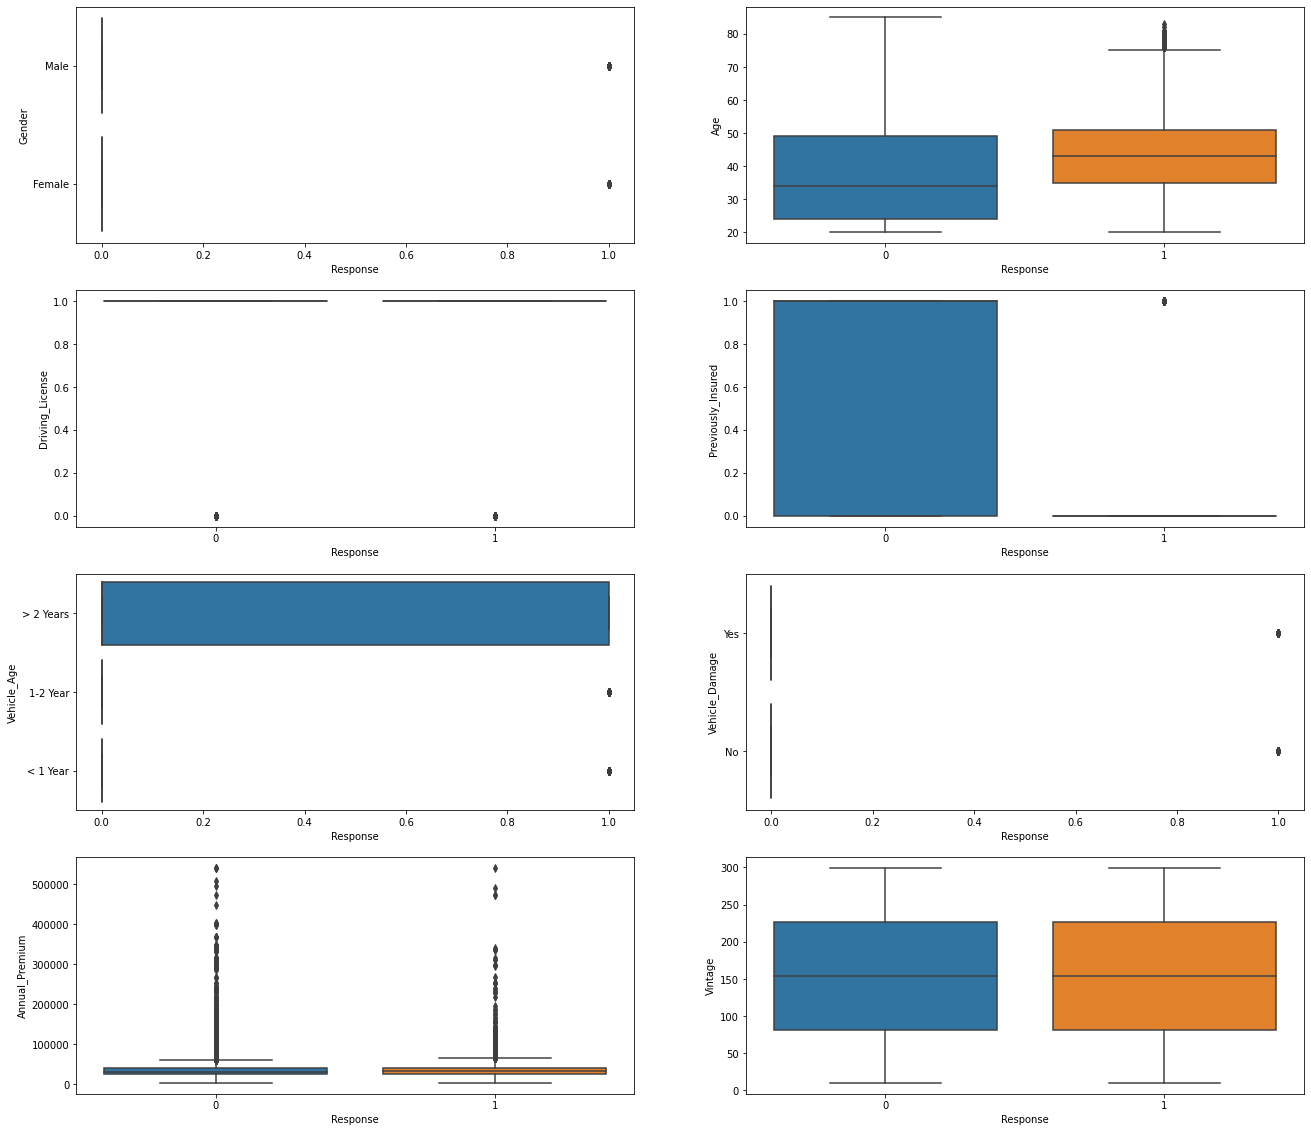

In [32]:
fig, axes = plt.subplots(4,2, figsize=(22,20))

sns.boxplot(ax=axes[0, 0], data=df, x='Response', y='Gender')
sns.boxplot(ax=axes[0, 1], data=df, x='Response', y='Age')
sns.boxplot(ax=axes[1, 0], data=df, x='Response', y='Driving_License')
sns.boxplot(ax=axes[1, 1], data=df, x='Response', y='Previously_Insured')
sns.boxplot(ax=axes[2, 0], data=df, x='Response', y='Vehicle_Age')
sns.boxplot(ax=axes[2, 1], data=df, x='Response', y='Vehicle_Damage')
sns.boxplot(ax=axes[3, 0], data=df, x='Response', y='Annual_Premium')
sns.boxplot(ax=axes[3, 1], data=df, x='Response', y='Vintage')

In [33]:
def outlier_treatment(datacolumn):
     sorted(datacolumn)
     Q1,Q3 = np.percentile(datacolumn , [25,75])
     IQR = Q3 - Q1
     lower_range = Q1 - (1.5 * IQR)
     upper_range = Q3 + (1.5 * IQR)
     return lower_range,upper_range

In [34]:
lowerbound,upperbound = outlier_treatment(df.Annual_Premium)

In [35]:
df[(df.Annual_Premium < lowerbound) | (df.Annual_Premium > upperbound)]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Age-binned
25,Female,21,1,1,< 1 Year,No,61964.0,72,0,Young_Age
37,Female,25,1,1,< 1 Year,No,76251.0,107,0,Young_Age
67,Male,60,1,0,1-2 Year,Yes,66338.0,73,0,Old_Age
139,Male,21,1,1,< 1 Year,No,62164.0,116,0,Young_Age
149,Female,22,1,1,< 1 Year,No,76651.0,258,0,Young_Age
...,...,...,...,...,...,...,...,...,...,...
380959,Male,25,1,1,< 1 Year,No,61909.0,161,0,Young_Age
380998,Female,33,1,0,1-2 Year,Yes,101664.0,21,0,Young_Age
381035,Female,22,1,1,< 1 Year,No,62889.0,295,0,Young_Age
381047,Female,52,1,1,1-2 Year,No,71915.0,233,0,Medium_Age


In [36]:
df.drop(df[ (df.Annual_Premium > upperbound) | (df.Annual_Premium < lowerbound) ].index , inplace=True)

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

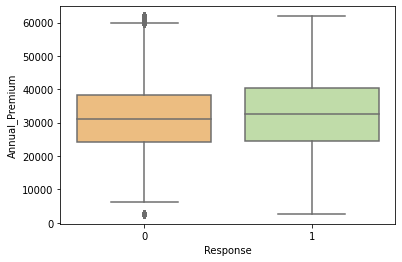

In [37]:
sns.boxplot( x='Response', y='Annual_Premium',data=df,palette='Spectral')

In [38]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response',
       'Age-binned'],
      dtype='object')

**LABEL ENCODING - CONVERTING CATEGORICAL TO NUMERIC VALUE**

In [39]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [40]:
label = LabelEncoder()
df['Vehicle_Age']=label.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage']=label.fit_transform(df['Vehicle_Damage'])
df['Gender']=pd.get_dummies(df["Gender"],drop_first=True)

In [41]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response',
       'Age-binned'],
      dtype='object')

In [42]:
feature = [ 'Gender', 'Driving_License', 
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Vintage'
       'Response']

In [43]:
x=df.iloc[:,:-1]

In [44]:
x

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,1,44,1,0,2,1,40454.0,217,1
1,1,76,1,0,0,0,33536.0,183,0
2,1,47,1,0,2,1,38294.0,27,1
3,1,21,1,1,1,0,28619.0,203,0
4,0,29,1,1,1,0,27496.0,39,0
...,...,...,...,...,...,...,...,...,...
381104,1,74,1,1,0,0,30170.0,88,0
381105,1,30,1,1,1,0,40016.0,131,0
381106,1,21,1,1,1,0,35118.0,161,0
381107,0,68,1,0,2,1,44617.0,74,0


In [45]:
y=df['Response']

In [46]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 370789, dtype: int64

**MODEL RESAMPLING - AS THE DATASET IS IMBALANCED**

**RANDOM SAMPLING**

In [47]:
from imblearn.over_sampling import RandomOverSampler

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


<AxesSubplot:xlabel='Response', ylabel='count'>

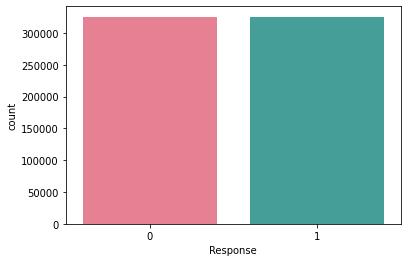

In [48]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.3,random_state=0)

In [50]:
x_train

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
555736,1,39,1,0,0,1,41026.0,262,1
626885,1,35,1,0,0,1,30501.0,85,1
101285,1,23,1,1,1,0,16598.0,235,0
599397,0,42,1,0,0,1,2630.0,280,1
644028,0,45,1,0,2,1,33411.0,234,1
...,...,...,...,...,...,...,...,...,...
359783,1,44,1,0,0,1,28778.0,84,1
152315,0,22,1,1,1,0,26285.0,110,0
117952,1,33,1,0,0,1,32700.0,297,0
435829,1,23,1,0,1,1,21723.0,244,1


In [51]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)

In [54]:
AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)


print(accuracy_score(y_pred,y_test))
print("ROC_AUC Score:",AUC_RF)

1.0
ROC_AUC Score: 1.0


In [55]:
lr=LogisticRegression(random_state = 666,n_jobs = -1)
clf_l = lr.fit(x_train,y_train)
y_pred_log = clf_l.predict(x_test)
print(accuracy_score(y_test,y_pred_log)*100)
print(roc_auc_score(y_test,y_pred_log)*100)

100.0
100.0


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [57]:
df_model1 = DecisionTreeClassifier()
df_model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
df_model1.score(x_test,y_test)

1.0

**SMOTEE**

In [59]:
smote = SMOTE(random_state=1,n_jobs=-1)

In [60]:
x_sample,y_sample = smote.fit_resample(df.iloc[:,:-1],df['Response'])

In [61]:
x_frame = pd.DataFrame(x_sample,columns=['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
                              'Vehicle_Damage', 'Annual_Premium', 'Vintage'])

In [62]:
x_frame.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
0,1,44,1,0,2,1,40454.0,217
1,1,76,1,0,0,0,33536.0,183
2,1,47,1,0,2,1,38294.0,27
3,1,21,1,1,1,0,28619.0,203
4,0,29,1,1,1,0,27496.0,39


In [63]:
y_frame = pd.DataFrame(y_sample,columns=['Response'])

In [64]:
y_frame.head()

,Response
0,1
1,0
2,1
3,0
4,0


In [65]:
y1=y_frame.copy()

In [66]:
x1=x_frame.copy()

Feature Engineering

In [67]:
'''
model = ExtraTreesClassifier()
model = model.fit(x1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x1.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()
'''

"\nmodel = ExtraTreesClassifier()\nmodel = model.fit(x1,y1)\nprint(model.feature_importances_) #use inbuilt class feature_importances of tree based clas\n#plot graph of feature importances for better visualization\nfeat_importances = pd.Series(model.feature_importances_, index=x1.columns)\nfeat_importances.nlargest(11).plot(kind='barh')\nplt.show()\n"

In [68]:
x1=x_frame.drop(['Driving_License'],axis=1,inplace=True)
x1=x_frame.copy()

In [69]:
x1.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
0,1,44,0,2,1,40454.0,217
1,1,76,0,0,0,33536.0,183
2,1,47,0,2,1,38294.0,27
3,1,21,1,1,0,28619.0,203
4,0,29,1,1,0,27496.0,39


**MODEL SPLITTING**

In [70]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=42)

**MODEL SCALING**

In [71]:
scaler = StandardScaler().fit(x_train1)
x_train_s = scaler.transform(x_train1)
x_test_s = scaler.transform(x_test1)

**MODEL BUILDING**

**LOGISTIC REGRESSION**

In [72]:
lr=LogisticRegression(random_state = 666,n_jobs = -1)
clf_l = lr.fit(x_train_s,y_train1)
y_pred_log = clf_l.predict(x_test_s)
print(accuracy_score(y_test1,y_pred_log)*100)
print(roc_auc_score(y_test1,y_pred_log)*100)



77.31585978165738
77.32807217554137


hyper parameter tuning

In [73]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [76]:
model_logreg_tuned.fit(x_train_s, y_train1)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall', verbose=1)

In [77]:
logreg_tuned = model_logreg_tuned.best_estimator_

In [78]:
y_tuned_logreg = logreg_tuned.predict(x_test_s)

In [79]:
logreg_tuned.score(x_test_s,y_test1)

0.7731662751239885

In [80]:
logreg_tuned.score(x_train_s,y_train1)

0.7728487142380052

In [81]:
print(classification_report(y_test1,y_tuned_logreg))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74     65188
           1       0.72      0.90      0.80     65066

    accuracy                           0.77    130254
   macro avg       0.79      0.77      0.77    130254
weighted avg       0.79      0.77      0.77    130254



Text(51.0, 0.5, 'Actual')

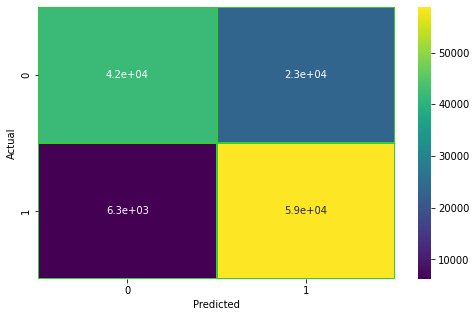

In [82]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test1,y_pred_log),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

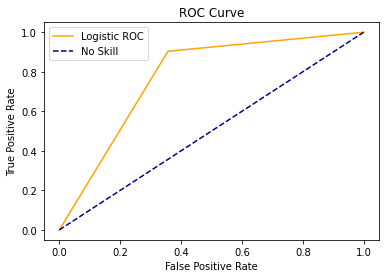

In [83]:
fpr,tpr,threshold=roc_curve(y_test1,y_pred_log)
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [84]:
import pickle

In [85]:
pickle.dump(logreg_tuned, open('logistic.pkl','wb'))

In [86]:
model_pred= pickle.load(open('logistic.pkl','rb'))
print(model_pred.predict([[1,44,0,3,1,40454.0,21]]))

[1]


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [88]:
df_model1 = DecisionTreeClassifier()
df_model1.fit(x_train_s,y_train1)
y_pred_log = df_model1.predict(x_test_s)
print(accuracy_score(y_test1,y_pred_log)*100)
print(roc_auc_score(y_test1,y_pred_log)*100)

83.28957268106929
83.29183463316504


In [101]:
print(classification_report(y_test1,y_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     65188
           1       0.82      0.86      0.84     65066

    accuracy                           0.83    130254
   macro avg       0.83      0.83      0.83    130254
weighted avg       0.83      0.83      0.83    130254



Hyperparameter tuning

In [89]:
DT_tuning = DecisionTreeClassifier()
param_DT =  {
    "max_depth": [None, 4,9,15,20,50],
    "min_samples_leaf": [ 1,4,0.1,2,10],
    "max_features" : [None, 0.2, 0.8, 2.0],
    "min_samples_split": [2,9,15,25]}

In [90]:
model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid = param_DT, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [91]:
model_DT_tuned.fit(x_train_s,y_train1)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 9, 15, 20, 50],
                         'max_features': [None, 0.2, 0.8, 2.0],
                         'min_samples_leaf': [1, 4, 0.1, 2, 10],
                         'min_samples_split': [2, 9, 15, 25]},
             scoring='recall', verbose=1)

In [92]:
DT_tuned = model_DT_tuned.best_estimator_

In [97]:
y_tuned_DT = DT_tuned.predict(x_test_s)

In [102]:
DT_tuned.score(x_test_s,y_test1)

0.739416831728776

In [103]:
print(classification_report(y_test1,y_tuned_DT))

              precision    recall  f1-score   support

           0       0.94      0.51      0.66     65188
           1       0.66      0.97      0.79     65066

    accuracy                           0.74    130254
   macro avg       0.80      0.74      0.73    130254
weighted avg       0.80      0.74      0.73    130254



Text(51.0, 0.5, 'Actual')

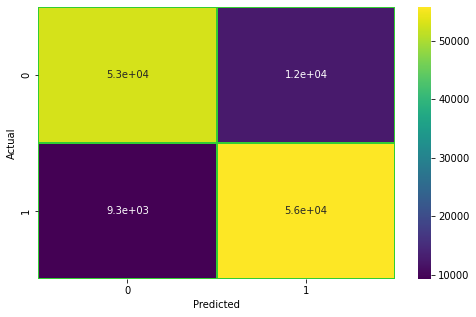

In [104]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test1,y_pred_log),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'limegreen',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

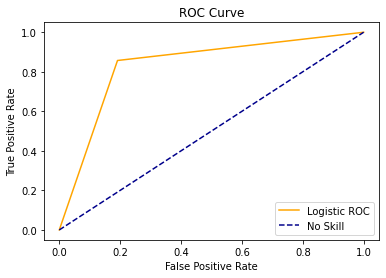

In [105]:
fpr,tpr,threshold=roc_curve(y_test1,y_pred_log)
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [106]:
pickle.dump(df_model1, open('DT_model.pkl','wb'))

In [107]:
model_pred= pickle.load(open('DT_model.pkl','rb'))
print(model_pred.predict([[1,44,0,3,1,40454.0,21]]))

[1]
